# Pytorch Workflow

In [133]:
import torch 
from torch import nn  # neural network
import matplotlib.pyplot as plt

torch.__version__ 

'2.1.0+cu121'

## 1. Data preparing and loading

Using linear regression formula as data

In [134]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1) # unsqueeze(1) adds a dimension to the tensor
y = weight * X + bias
len(X), len(y)

(50, 50)

### Split the data into training and test sets

In [135]:
train_size = int(len(X) * 0.8)
XTrain, yTrain = X[:train_size], y[:train_size]
XTest, yTest = X[train_size:], y[train_size:]

### Visualize Data

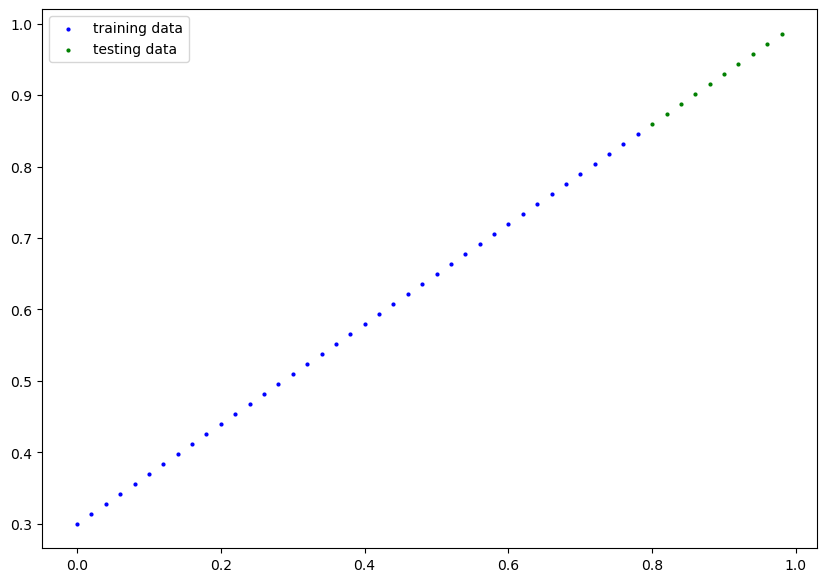

In [136]:
def plotPredictions(trainData, trainLabels, testData, testLabels, predicted=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(trainData.numpy(), trainLabels.numpy(), s = 4, color='blue', label='training data')
    plt.scatter(testData.numpy(), testLabels.numpy(), s = 4, color='green', label='testing data')
    if predicted is not None:
        plt.scatter(testData.numpy(), predicted.numpy(), s = 4, color='red', label='predictions')
    plt.legend()
    plt.show()

plotPredictions(XTrain, yTrain, XTest, yTest)

## 2. Build Model

In [137]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
                
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x: training data
        return self.weights * x + self.bias  # linear regression model

In [138]:
# Create a random seed
torch.manual_seed(42)
model0 = LinearRegressionModel()
list(model0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [139]:
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [140]:
with torch.inference_mode():
    yPreds = model0(XTest)
yPreds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

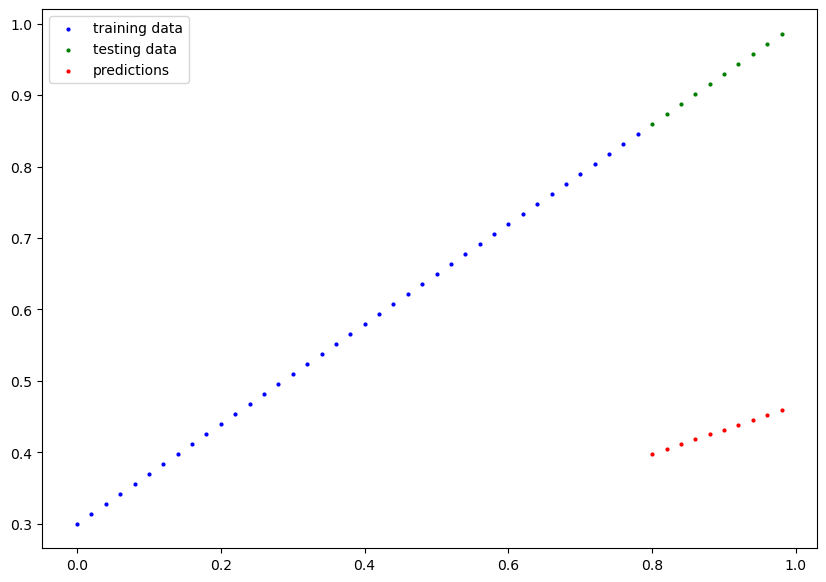

In [141]:
plotPredictions(XTrain, yTrain, XTest, yTest, yPreds)

In [142]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model0.parameters(), lr=0.0001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.0001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Build a training loop in pytorch

In [143]:
epochs = 30000
epoch_count = []
losses = []
test_losses = []
# loop through the data
for epoch in range(epochs):
    model0.train()
    y_pred = model0(XTrain)
    loss = loss_fn(y_pred, yTrain)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    with torch.inference_mode():
        test_pred = model0(XTest)
        test_loss = loss_fn(test_pred, yTest)
    if epoch % 100 == 0:
        epoch_count.append(epoch)
        losses.append(loss.detach().numpy())
        test_losses.append(test_loss.detach().numpy())
        print(
            f'Epoch {epoch + 1} | Training Loss: {loss.item():.4f} | Test Loss: {test_loss.item():.4f}')

Epoch 1 | Training Loss: 0.3129 | Test Loss: 0.4944
Epoch 101 | Training Loss: 0.3014 | Test Loss: 0.4809
Epoch 201 | Training Loss: 0.2898 | Test Loss: 0.4675


Epoch 301 | Training Loss: 0.2783 | Test Loss: 0.4540
Epoch 401 | Training Loss: 0.2668 | Test Loss: 0.4405
Epoch 501 | Training Loss: 0.2553 | Test Loss: 0.4270
Epoch 601 | Training Loss: 0.2438 | Test Loss: 0.4136
Epoch 701 | Training Loss: 0.2322 | Test Loss: 0.4001
Epoch 801 | Training Loss: 0.2207 | Test Loss: 0.3866
Epoch 901 | Training Loss: 0.2092 | Test Loss: 0.3732
Epoch 1001 | Training Loss: 0.1977 | Test Loss: 0.3597
Epoch 1101 | Training Loss: 0.1861 | Test Loss: 0.3462
Epoch 1201 | Training Loss: 0.1746 | Test Loss: 0.3327
Epoch 1301 | Training Loss: 0.1631 | Test Loss: 0.3193
Epoch 1401 | Training Loss: 0.1516 | Test Loss: 0.3058
Epoch 1501 | Training Loss: 0.1401 | Test Loss: 0.2923
Epoch 1601 | Training Loss: 0.1285 | Test Loss: 0.2789
Epoch 1701 | Training Loss: 0.1170 | Test Loss: 0.2654
Epoch 1801 | Training Loss: 0.1066 | Test Loss: 0.2525
Epoch 1901 | Training Loss: 0.0975 | Test Loss: 0.2404
Epoch 2001 | Training Loss: 0.0898 | Test Loss: 0.2291
Epoch 2101 | Trai

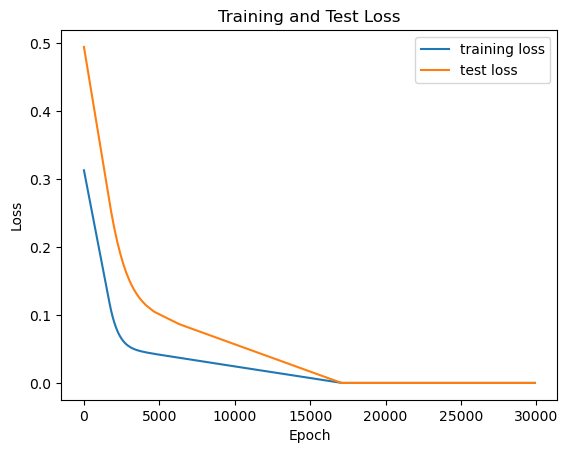

In [144]:
plt.plot(epoch_count, losses, label='training loss')
plt.plot(epoch_count, test_losses, label='test loss')
plt.title('Training and Test Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

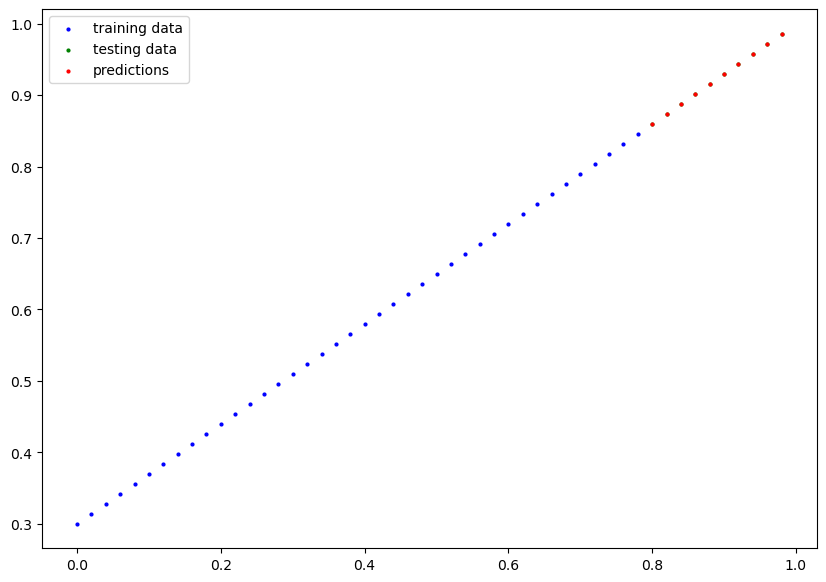

In [145]:
with torch.inference_mode():
    yPreds = model0(XTest)
plotPredictions(XTrain, yTrain, XTest, yTest, yPreds)

In [146]:
model0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

### Saving and Loading Models

In [148]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(exist_ok=True, parents=True)


In [149]:
# 2. Save model
MODEL_NAME = '01_pytorch_linear_regression.pt'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

WindowsPath('models/01_pytorch_linear_regression.pt')

In [150]:
torch.save(model0.state_dict(), MODEL_SAVE_PATH)

In [151]:
model0.state_dict()


OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [152]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

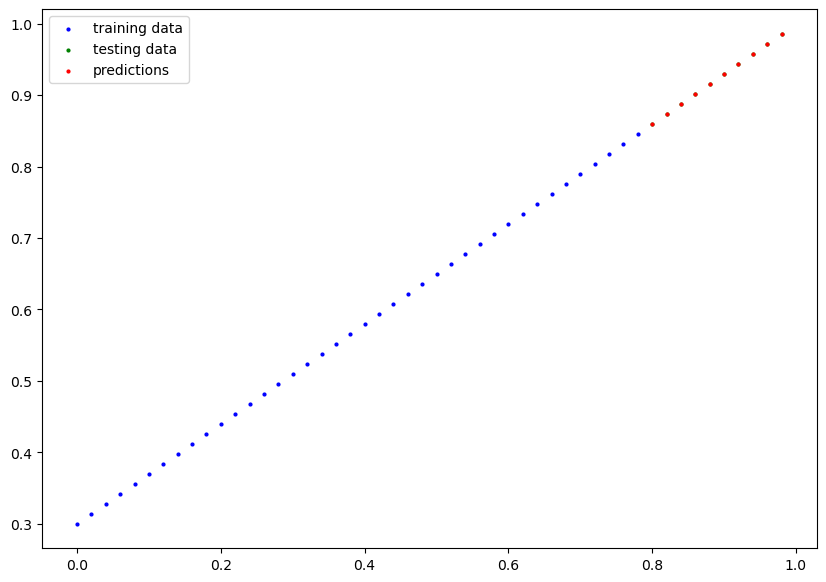

In [153]:
loaded_model.eval()
with torch.inference_mode():
    yPreds = loaded_model(XTest)
    plotPredictions(XTrain, yTrain, XTest, yTest, yPreds)    

In [155]:
yPreds == loaded_model(XTest)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Integrate All these Steps

In [156]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

In [157]:
# device agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device} device")

Using cuda device
